# PSBL with Blended Astrometry

This examples shows how the PSBL model astrometry is affected by blending from lens light. In this example, we use two different sets of parameters, one with luminous lenses and one with dark lenses. We assume no neighbors for simplicity.

The event parameters are:
 

   
| Param        | Blended Value | Unblended Value | units                             |
|--------------|---------------|-----------------|-----------------------------------|
| Lens R.A.    | 259.5         | 259.5           | deg                               |
| Lens Dec.    | -29.0         | -29.0           | deg                               |
| $t_0$        | 57000         | 57000           | days                              |
| $u_0$        | 0.3           | 0.3             |                                   |
| $t_E$        | 200.0         | 200.0           | days                              |               
| $\pi_{E,E}$  | 0.01          | 0.01            |                                   |             
| $\pi_{E,N}$  | -0.01         | -0.01           |                                   |           
| $b_{sff}$    | [0.5]         | [1.0]           | $f_S$ / ($f_S + f_{L1} + f_{L2}$) |  
| $mag_{src}$  | [18]          | [18]            |                                   |
| $\theta_E$   | 3.0           | 3.0             | mas                               |
| $x_{S0,E}$   | 0.0           | 0.0             | arcsec                            |          
| $x_{S0,N}$   | 0.01          | 0.01            | arcsec                            |
| $\mu_{S,E}$  | 3.0           | 3.0             | mas/yr                            |                       
| $\mu_{S,N}$  | 0.0           | 0.0             | mas/yr                            |                     
| $\pi_S$      | (1 / 8 kpc)   | (1 / 8 kpc)     | mas                               |
| $q$          | 0.8           | 0.8             | $M_1$ / $M_2$                     |              
| $sep$        | 3.0           | 3.0             | mas                               |               
| $\alpha$     | 135.0         | 135.0           | deg                               |
| $dm_{L1,L2}$ | [-0.5]        | [0.0]           | -2.5 * log10($f_{L1} / f_{L2}$)   |


In [30]:
%load_ext autoreload
%autoreload 2
from bagle import model
import numpy as np
import pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Define parameters

In [83]:
raL = 259.5
decL = -29.0
t0 = 57000
u0 = 0.3  # in units of Einstein radii
tE = 200.0
piE_E = 0.01
piE_N = -0.01
mag_src = np.array([18])
thetaE = 3.0  # in mas
xS0_E = 0.0
xS0_N = 0.01
muS_E = 3.0
muS_N = 0.0
piS = (1.0 / 8000.0) * 1e3  # mas
q = 0.8  # M2 / M1
sep = 3.0  # mas
alpha = 135.0

# Blended
b_sff_1 = np.array([0.7])
dm_L1_L2_1 = np.array([-0.1])

# Unblended
b_sff_2 = np.array([1.0])
dm_L1_L2_2 = np.array([0.0])

Make two BAGLE models. 

In [84]:

psbl1 = model.PSBL_PhotAstrom_noPar_Param2(t0, u0, tE,
                                           thetaE, piS,
                                           piE_E, piE_N,
                                           xS0_E, xS0_N,
                                           muS_E, muS_N,
                                           q, sep, alpha,
                                           b_sff_1, mag_src,
                                           dm_L1_L2_1, 
                                           root_tol=1e-4)

psbl2 = model.PSBL_PhotAstrom_noPar_Param2(t0, u0, tE,
                                           thetaE, piS,
                                           piE_E, piE_N,
                                           xS0_E, xS0_N,
                                           muS_E, muS_N,
                                           q, sep, alpha,
                                           b_sff_2, mag_src,
                                           dm_L1_L2_2,
                                           root_tol=1e-4)


In [87]:
# Get the astrometry of the two over some time array.
t_mod = np.arange(t0 - 5*tE, t0 + 5*tE, 1)

magL1_1, magL2_1 = psbl1.get_resolved_lens_photometry()
magL1_2, magL2_2 = psbl2.get_resolved_lens_photometry()
print(f'Blended   magL1 = {magL1_1:.2f}, magL2 = {magL2_1:.2f}')
print(f'Unblended magL1 = {magL1_2:.2f}, magL2 = {magL2_2:.2f}')

# Lens and source positions (with no lensing)
xL1, xL2 = psbl1.get_resolved_lens_astrometry(t_mod)
xS = psbl1.get_astrometry_unlensed(t_mod)

# Centroid positions
ast1 = psbl1.get_astrometry(t_mod)
ast2 = psbl2.get_astrometry(t_mod)

Blended   magL1 = 19.62, magL2 = 19.72
Unblended magL1 = inf, magL2 = inf


Make plots. Notice how the unblended curve asymptotes to the source trajectory. The blended curve asymptotes to something in between the lens and source trajectory. 

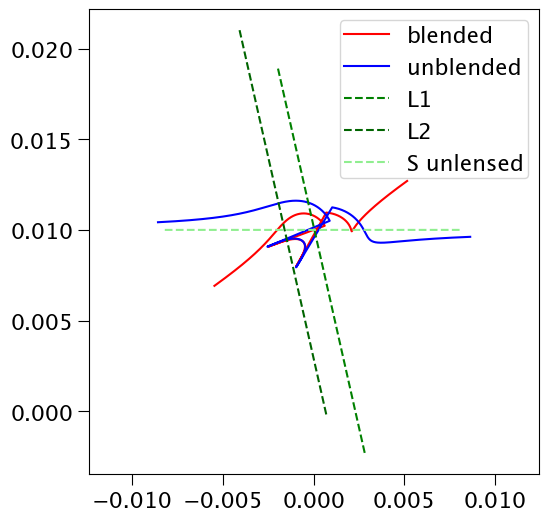

In [89]:
plt.figure()
plt.plot(ast1[:, 0], ast1[:, 1], color='red', label='blended')
plt.plot(ast2[:, 0], ast2[:, 1], color='blue', label='unblended')
plt.plot(xL1[:, 0], xL1[:, 1], color='green', ls='--', label='L1')
plt.plot(xL2[:, 0], xL2[:, 1], color='darkgreen', ls='--', label='L2')
plt.plot(xS[:, 0],  xS[:, 1], color='lightgreen', ls='--', label='S unlensed')
plt.axis('equal')
plt.legend()